In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
train=pd.read_csv('../b_train.csv', parse_dates=['datetime'])
test=pd.read_csv('../b_test.csv', parse_dates=['datetime'])
sub=pd.read_csv('../b_sampleSubmission.csv', parse_dates=['datetime'])


### 01. datetime은 언제부터 언제까지의 데이터일까?

In [7]:
print(list(train['datetime'])[0])
print(list(train['datetime'])[-1])

2011-01-01 00:00:00
2012-12-19 23:00:00


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("pandas 버전 ", pd.__version__) 
print("seaborn 버전 ", sns.__version__) 

pandas 버전  1.1.3
seaborn 버전  0.11.0


### 02-A count와 temp는 어떤 상관관계가 있을까?
 - 산점도(scatter plot)로 확인해 보기 - matplotlib 활용해 보기
 - type은 점으로 표시
 - 투명도를 0.2로 표현

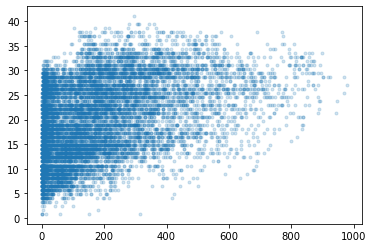

In [9]:
plt.scatter(train['count'], train['temp'],marker='.',alpha=0.2)
plt.show()

### 02-B corr()를 활용하여 count와 다른 feature(특징)간의 상관계수를 확인해 보자.
 - 가장 높은 상관관계를 갖는 순서로 정렬시켜보자.(pandas)
 - 이를 수평 막대 그래프로 표시해 보자 - matplotlib 활용해 보기

In [10]:
count_ranks = abs(train.corr()["count"]).sort_values(ascending=False)
count_ranks

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
humidity      0.317371
season        0.163439
weather       0.128655
windspeed     0.101369
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64

<AxesSubplot:>

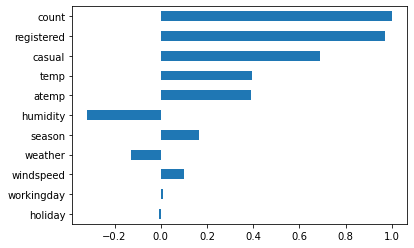

In [11]:
train.corr()["count"][count_ranks.index[::-1]].plot(kind="barh")

### 03. 계절별 데이터를 확인 및 시각화 해 보자.
 - season의 값의 종류와 count를 확인해 보기
 - barplot 표시할 때, x축을 1,2,3,4만 표시되도록 하자.
 - matplotlib 활용해 보기(

In [12]:
train['season'].value_counts()
only_season = abs(train['season'].value_counts())
only_season

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

<BarContainer object of 4 artists>

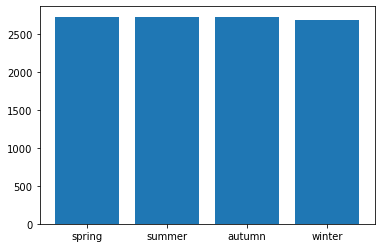

In [13]:
only_season.index=['spring','summer','autumn','winter']
plt.bar(only_season.index,only_season.values)

### 04. 쉬는날과 아닌날의 데이터는 얼마나 될까? 이를 시각화하기
 - holiday의 값의 종류와 count를 확인해 보기
 - 시각화 해보기(matplotlib 활용)


holiday=train['holiday'].value_counts()
holiday.index=['holiday','non_holiday']

<AxesSubplot:>

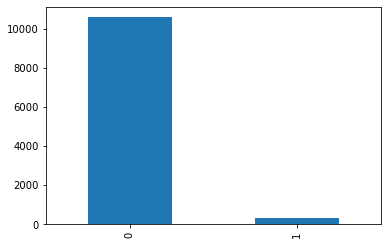

In [14]:
train['holiday'].value_counts().plot(kind='bar')

### 05. weather는 어떤 값을 갖고, 각각의 데이터의 수는 얼마나 될까?(시각화하기)
 - weather의 값의 종류와 count를 확인해 보기
 - 시각화 해보기(matplotlib 활용)

<AxesSubplot:>

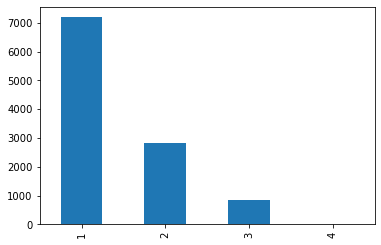

In [15]:
train['weather'].value_counts().plot(kind='bar')

### 06. 아래의 값의 분포를 2행, 2열로 표시해 보자.
 - temp의 값의 분포는 어떠할까?
 - atemp의 값의 분포는 어떠할까?
 - humidity의 값의 분포는 어떠할까?
 - windspeed의 값의 분포는 어떠할까?
 - 전체 그래프에 대한 제목을 달아보자(suptitle, 크기(size)=20) )
 - 각각의 그래프에 대한 x축 레이블을 넣어보자(크기는 17)
 - 시각화 해보기(matplotlib 활용)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [17]:
temp=train['temp'].value_counts()
atemp=train['atemp'].value_counts()
humidity=train['humidity'].value_counts()
windspeed=train['windspeed'].value_counts()

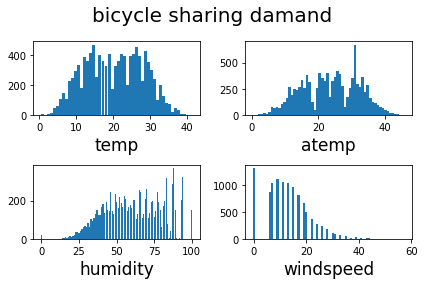

In [21]:
fig,axes=plt.subplots(2,2)
plt.suptitle('bicycle sharing damand',size=20)

axes[0,0].bar(temp.index,temp.values)
axes[0,1].bar(atemp.index,atemp.values)
axes[1,0].bar(humidity.index, humidity.values)
axes[1,1].bar(windspeed.index,windspeed.values)

axes[0,0].set_xlabel('temp',size=17)
axes[0,1].set_xlabel('atemp',size=17)
axes[1,0].set_xlabel('humidity',size=17)
axes[1,1].set_xlabel('windspeed',size=17)

plt.tight_layout()
plt.show()

### 07. weather별 데이터의 비율은 어느정도 될까?
 - 시각화 해보기(matplotlib 활용)
 - 이에 대해서 pie 그래프로 나타내 보자.
 - label은 한글로 '봄', '여름', '가을', '겨울'로 표시해 보자.


In [19]:
weather=train['weather'].value_counts()

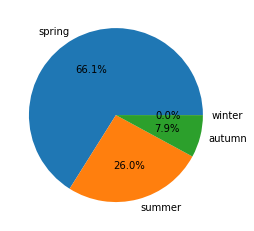

In [20]:
title=['spring','summer','autumn','winter']
plt.pie(weather.values,labels=title,autopct='%1.1f%%')
plt.show()